<a href="https://colab.research.google.com/github/arfanrifqi/youtubeAPI/blob/main/youtube_sentiment_analysis_at_kasisoulsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
# Import libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from googleapiclient.discovery import build

In [ ]:
api_key = "...."
youtube = build('youtube', 'v3', developerKey=api_key)

In [ ]:
box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]

code_lang = [{"id":"BfKsPNShh_Q"}]

In [ ]:
for id_code in code_lang:
    def scrape_comments_with_replies():
        data = youtube.commentThreads().list(part='snippet', videoId=id_code['id'], maxResults='100', textFormat="plainText").execute()
        
        for i in data["items"]:
            name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
            comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
            published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
            likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
            replies = i["snippet"]['totalReplyCount']
            
            box.append([name, comment, published_at, likes, replies])
            
            totalReplyCount = i["snippet"]['totalReplyCount']
            
            if totalReplyCount > 0:
                
                parent = i["snippet"]['topLevelComment']["id"]
                
                data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()
                
                for i in data2["items"]:
                    name = i["snippet"]["authorDisplayName"]
                    comment = i["snippet"]["textDisplay"]
                    published_at = i["snippet"]['publishedAt']
                    likes = i["snippet"]['likeCount']
                    replies = ""

                    box.append([name, comment, published_at, likes, replies])

        while ("nextPageToken" in data):
            
            data = youtube.commentThreads().list(part='snippet', videoId=id_code['id'], pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()
                                             
            for i in data["items"]:
                name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
                comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
                published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
                likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
                replies = i["snippet"]['totalReplyCount']

                box.append([name, comment, published_at, likes, replies])

                totalReplyCount = i["snippet"]['totalReplyCount']

                if totalReplyCount > 0:
                    
                    parent = i["snippet"]['topLevelComment']["id"]

                    data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                    textFormat="plainText").execute()

                    for i in data2["items"]:
                        name = i["snippet"]["authorDisplayName"]
                        comment = i["snippet"]["textDisplay"]
                        published_at = i["snippet"]['publishedAt']
                        likes = i["snippet"]['likeCount']
                        replies = ''

                        box.append([name, comment, published_at, likes, replies])

        df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})
        
        sql_vids = pd.DataFrame([])

        sql_vids = sql_vids.append(df, ignore_index = True)

        sql_vids.to_csv('youtube_comments.csv', index=False, header=False)
    
    scrape_comments_with_replies()

In [ ]:
df_load = pd.read_csv('/content/youtube_comments.csv')
df_load.head()

,Name,Comment,Time,Likes,Reply Count
0,CaraKehidupan,"Malah kepikiran ky gn kl ane, pendengar mah cm...",2022-07-13T05:22:29Z,0,0.0
1,Then&Now ID,"Hostnya tidak bisa nempatin diri,, harusnya ta...",2022-07-13T03:41:25Z,0,0.0
2,Winarko Budi prijono,muka uki x noah kok mirip onad x killing,2022-07-11T08:52:25Z,0,0.0
3,Wili Rico,Panggil Bang Rhoma dong...kenapa masih main musik,2022-07-11T01:00:05Z,0,0.0
4,Fiqri Fajri,Merasa yang lu pahami yang paling haq dan yang...,2022-07-09T14:13:30Z,0,0.0


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3619 non-null   object 
 1   Comment      3619 non-null   object 
 2   Time         3619 non-null   object 
 3   Likes        3619 non-null   int64  
 4   Reply Count  2425 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 141.5+ KB


In [ ]:
df_load['Likes'].unique()

array([   0,    1,    2,   20,    3,    9,  123,    4,    7,   34,    5,
         32,   12,   39,   87,   23,   47,   30,   15,   31,   37,   11,
         18,   21,   40,   13,    8,   44,    6,   10,   19,   41,   36,
         33,   17,  344,   14,   27,   59,   50,   22,  121,   25,   28,
         16,   82,  775,   51,   29,   48,   52,   24,   67,  249,   61,
         26, 1003,  110,  695,   45,   74,  134,   91,  178,  392,  185,
        100])

In [ ]:
df_load.describe(include='all')

,Name,Comment,Time,Likes,Reply Count
count,3619,3619,3619,3619.000000,2425.000000
unique,2757,3511,3616,NaN,NaN
top,AM,Up,2021-12-03T02:10:14Z,NaN,NaN
freq,40,37,2,NaN,NaN
mean,NaN,NaN,NaN,2.768444,0.581031
std,NaN,NaN,NaN,27.183812,6.026424
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,0.000000


# EDA

In [ ]:
cat_features =['Comment']

In [ ]:
for col in cat_features:
  print(f'''value count kolom {col} :''')
  print(df_load[col].value_counts())
  print()

value count kolom Comment :
Up                                                                                                                                                                                                                                                                                                                                                                                                                                      37
Masya Allah                                                                                                                                                                                                                                                                                                                                                                                                                              9
Setuju                                                                                                                

##comments like from netidzen

In [ ]:
import seaborn as sns

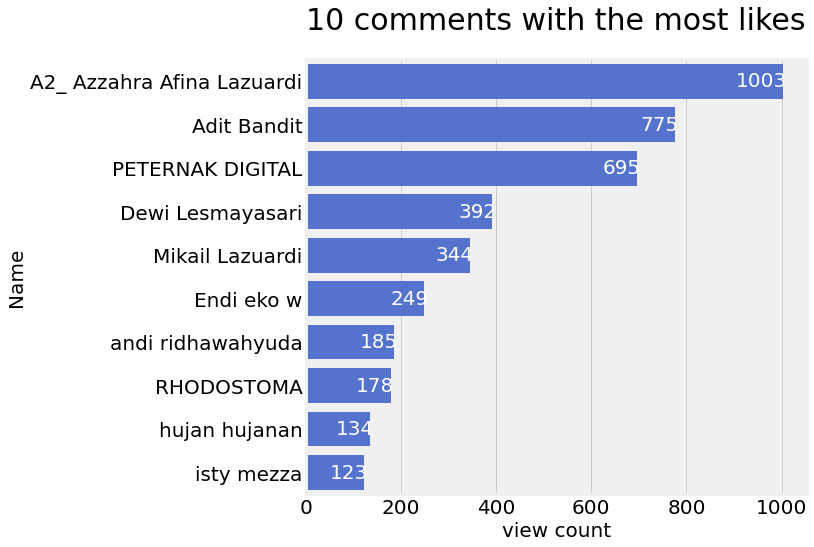

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
data = df_load.sort_values(['Likes'], ascending=False)[:10]

sns.barplot(x='Likes',
            y='Name',
            data=data,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(4, 0), textcoords='offset points', ha="right", va="center" ,color='white',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('10 comments with the most likes', fontsize=30, loc='left', pad=30)
plt.xlabel('view count', fontsize=20)
plt.ylabel('Name', fontsize=20)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

## best comment

In [ ]:
pd.set_option("display.max_colwidth", 1000)

In [ ]:
df_load.set_index("Name", inplace = True)

In [ ]:
result = df_load.loc[["A2_ Azzahra Afina Lazuardi","Adit Bandit","PETERNAK DIGITAL","Dewi Lesmayasari","Mikail Lazuardi"]]
result

,Comment,Time,Likes,Reply Count
Name,,,,
A2_ Azzahra Afina Lazuardi,"Akhi derry, afwan kadang antum hrs sedikit menahan ketika narasumber bercerita agar tidak bias apa yg disampaikan narasumber. Ana pribadi kadang sedang terharu dengan apa yg disampaikan narasumber tp tertutup feelnya dengan ketawa antum yg besar atau pertanyaan antum yg memotong cerita narasumber. \n\nAfwan ya semoga berkenan dan kedepannya makin lebih baik lagi podcast ini serta bermanfaat dunia akhirat untuk kita.\n\nBarokallahufik",2021-12-02T14:44:22Z,1003,173.0
Adit Bandit,"Walaupun gue msh dengerin musik dan merokok, tp gue yakin bahwa manhaj ini adalah yg haq!\n\nSukses terus utk podcastnya akhi, semoga bisa terus membawa dakwah dgn cara interaktif dan disukai anak2 muda kedepan",2021-12-06T11:45:26Z,775,158.0
PETERNAK DIGITAL,"*undang andry franzi, mantan gitaris power slave, boomerang & maha dewa, beliau juga hijrah ke manhaj salaf*",2021-12-02T10:44:43Z,695,128.0
Dewi Lesmayasari,Beli dimana habatusaudah nya mas,2021-12-01T16:07:55Z,0,0.0
Dewi Lesmayasari,MasyaAllah salaf ajaran yg bikin hati tenang,2021-12-01T15:46:51Z,45,0.0
Dewi Lesmayasari,"MasyaAllah , anakku laki2 dua nya sudah resign dari bank , krn mencintai dan takut pd Allah , kini mrk usaha dng tekun....dan Allah maha menolong ,mrk kini hidup tenang dan bahagia Alhamdulillah",2021-12-01T15:44:27Z,392,106.0
Mikail Lazuardi,"Kenal manhaj salaf berasa baru masuk Islam, asli.. Banyak bgt hukum2 yg baru tau, selama ini terlalu di ""toleransiin"".",2021-12-20T14:37:55Z,344,35.0


In [ ]:
df_load['Time'] = pd.to_datetime(df_load['Time'])
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3619 entries, CaraKehidupan to abdul khalik
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Comment      3619 non-null   object             
 1   Time         3619 non-null   datetime64[ns, UTC]
 2   Likes        3619 non-null   int64              
 3   Reply Count  2425 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 270.4+ KB


In [ ]:
df_load.head(2)

,Comment,Time,Likes,Reply Count
Name,,,,
CaraKehidupan,"Malah kepikiran ky gn kl ane, pendengar mah cm pemakai, nah musisi nya itu pengedar😅. Manrabbuka ""pengedar yah?"" abis lu",2022-07-13 05:22:29+00:00,0,0.0
Then&Now ID,"Hostnya tidak bisa nempatin diri,, harusnya tahu kapan ngomong dan kapan mendegarkan, malah ngegas terus dan ngecut omongan si Uki..harus tau Porsi",2022-07-13 03:41:25+00:00,0,0.0


In [ ]:
from pandas.core.indexes.datetimes import DatetimeIndex

In [ ]:
df_load['Months'] = DatetimeIndex(df_load['Time']).month
df_load.sample(2)

,Comment,Time,Likes,Reply Count,Months
Name,,,,,
rizki hendrian nugraha,MasyaAllah Tabarakallah kang uki. Semoga istiqomah,2021-12-02 04:41:01+00:00,17,0.0,12
uki ahmad,إن شا ءالله ...\nkarena surga itu karena Rahmat الله,2021-12-16 07:02:40+00:00,0,NaN,12


In [ ]:
df_load['Days'] = DatetimeIndex(df_load['Time']).day
df_load.sample(2)

,Comment,Time,Likes,Reply Count,Months,Days
Name,,,,,,
Asset Pro,"Ana dan antum,",2021-12-03 11:21:51+00:00,0,0.0,12,3
cah oszlo,semoga Ariel ketularan hijrah.... amieen,2022-01-07 08:44:09+00:00,0,NaN,1,7


In [ ]:
df_load['Weeks'] = DatetimeIndex(df_load['Time']).week
df_load.sample(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,Comment,Time,Likes,Reply Count,Months,Days,Weeks
Name,,,,,,,
Latania Kansa,Up,2021-12-01 23:20:38+00:00,0,NaN,12,1,48
Indra Gunawan,Mohon maap bang sebesar2 nya jangan sering memotong pembicaraan narasumber...🙏🙏🙏🙏,2022-01-20 19:46:22+00:00,0,0.0,1,20,3


## most visitors per month

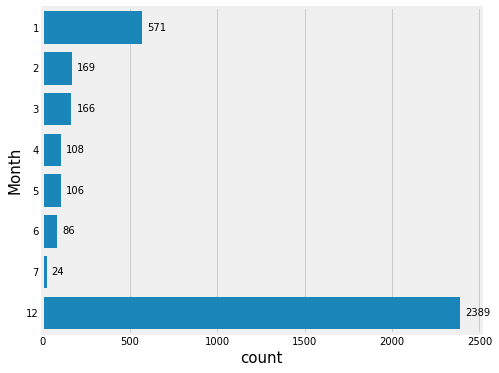

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="Months", data=df_load, color='#008fd5')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.ylabel('Month', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.show()

## most visitors per week

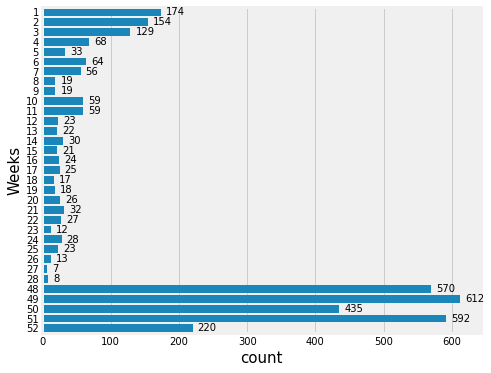

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="Weeks", data=df_load, color='#008fd5')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.ylabel('Weeks', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.show()

## clean comment

In [ ]:
# Function
def cleanTxt(text):
  text = re.sub(r'[^\w]', ' ', text)

  return text

df_load['Comment'] = df_load['Comment'].apply(cleanTxt)

## Polarity and Subjectivity

In [ ]:
# get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Columns
df_load['Subjectivity'] = df_load['Comment'].apply(getSubjectivity)
df_load['Polarity'] = df_load['Comment'].apply(getPolarity)

df_load.head()

,Comment,Time,Likes,Reply Count,Months,Days,Weeks,Subjectivity,Polarity
Name,,,,,,,,,
CaraKehidupan,Malah kepikiran ky gn kl ane pendengar mah cm pemakai nah musisi nya itu pengedar Manrabbuka pengedar yah abis lu,2022-07-13 05:22:29+00:00,0,0.0,7,13,28,0.000000,0.000000
Then&Now ID,Hostnya tidak bisa nempatin diri harusnya tahu kapan ngomong dan kapan mendegarkan malah ngegas terus dan ngecut omongan si Uki harus tau Porsi,2022-07-13 03:41:25+00:00,0,0.0,7,13,28,0.000000,0.000000
Winarko Budi prijono,muka uki x noah kok mirip onad x killing,2022-07-11 08:52:25+00:00,0,0.0,7,11,28,0.000000,0.000000
Wili Rico,Panggil Bang Rhoma dong kenapa masih main musik,2022-07-11 01:00:05+00:00,0,0.0,7,11,28,0.333333,0.166667
Fiqri Fajri,Merasa yang lu pahami yang paling haq dan yang lain salah merasa ajaran lu paling dekat dengan sahabat nabi pokoknya paling bener dah lu Der Derry nge gas banget merasa paling suci wkwkwk,2022-07-09 14:13:30+00:00,0,0.0,7,9,27,0.000000,0.000000


<function matplotlib.pyplot.show>

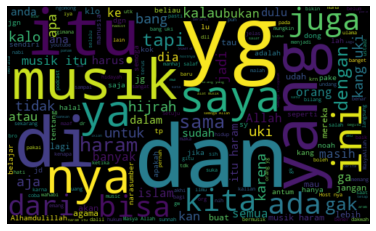

In [ ]:
allWords = ' '.join( [cmts for cmts in df_load['Comment']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
# function to compute analysis
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_load['Analysis'] = df_load['Polarity'].apply(getAnalysis)

In [ ]:
# % Percentages:
pcomments = df_load[df_load.Analysis == 'Positive']
pcomments = pcomments['Comment']

print('Positive: ' +str(round((pcomments.shape[0]/df_load.shape[0])*100, 1))+ '%')

ncomments = df_load[df_load.Analysis == 'Negative']
ncomments = ncomments['Comment']

print('Negative: ' +str(round((ncomments.shape[0]/df_load.shape[0])*100, 1))+ '%')

nucomments = df_load[df_load.Analysis == 'Neutral']
nucomments = nucomments['Comment']

print('Nuetral: ' +str(round((nucomments.shape[0]/df_load.shape[0])*100, 1))+ '%')

Positive: 5.1%
Negative: 0.9%
Nuetral: 93.9%


In [ ]:
print(df_load["Analysis"].value_counts())

Neutral     3400
Positive     186
Negative      33
Name: Analysis, dtype: int64


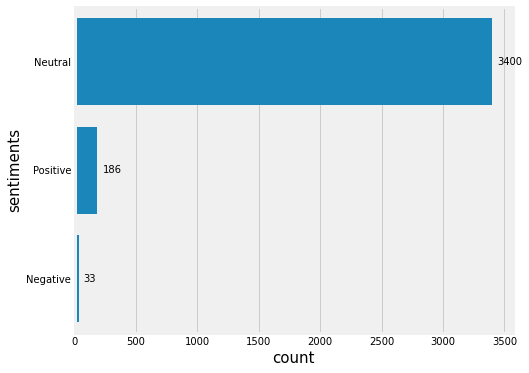

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="Analysis", data=df_load, color='#008fd5')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.ylabel('sentiments', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.show()

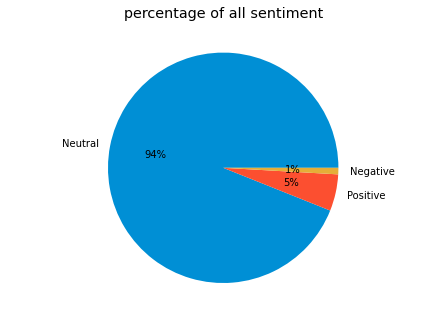

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Neutral','Positive','Negative']

nanny = df_load.Analysis.value_counts()
ax.pie(nanny, labels=labels, autopct='%.0f%%')
ax.set_title('percentage of all sentiment')
plt.show()

In [ ]:
df_load.head(3)

,Comment,Time,Likes,Reply Count,Months,Days,Weeks,Subjectivity,Polarity,Analysis
Name,,,,,,,,,,
CaraKehidupan,Malah kepikiran ky gn kl ane pendengar mah cm pemakai nah musisi nya itu pengedar Manrabbuka pengedar yah abis lu,2022-07-13 05:22:29+00:00,0,0.0,7,13,28,0.0,0.0,Neutral
Then&Now ID,Hostnya tidak bisa nempatin diri harusnya tahu kapan ngomong dan kapan mendegarkan malah ngegas terus dan ngecut omongan si Uki harus tau Porsi,2022-07-13 03:41:25+00:00,0,0.0,7,13,28,0.0,0.0,Neutral
Winarko Budi prijono,muka uki x noah kok mirip onad x killing,2022-07-11 08:52:25+00:00,0,0.0,7,11,28,0.0,0.0,Neutral
